
<img src="https://user-images.githubusercontent.com/7065401/58563302-42466a80-8201-11e9-9948-b3e9f88a5662.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>


## Bike store sales

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)



In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [222]:
sales = pd.read_csv('/kaggle/input/sales-data/sales_data.csv', parse_dates=['Date'])

In [223]:
sales.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Customers_Age`?

Why don't you try with `.mean()`

In [224]:
sales['Customer_Age'].mean()

35.91921157861212

Go ahead and show a <b>density (KDE)</b> and a <b>box plot</b> with the `Customer_Age` data:

<Axes: ylabel='Density'>

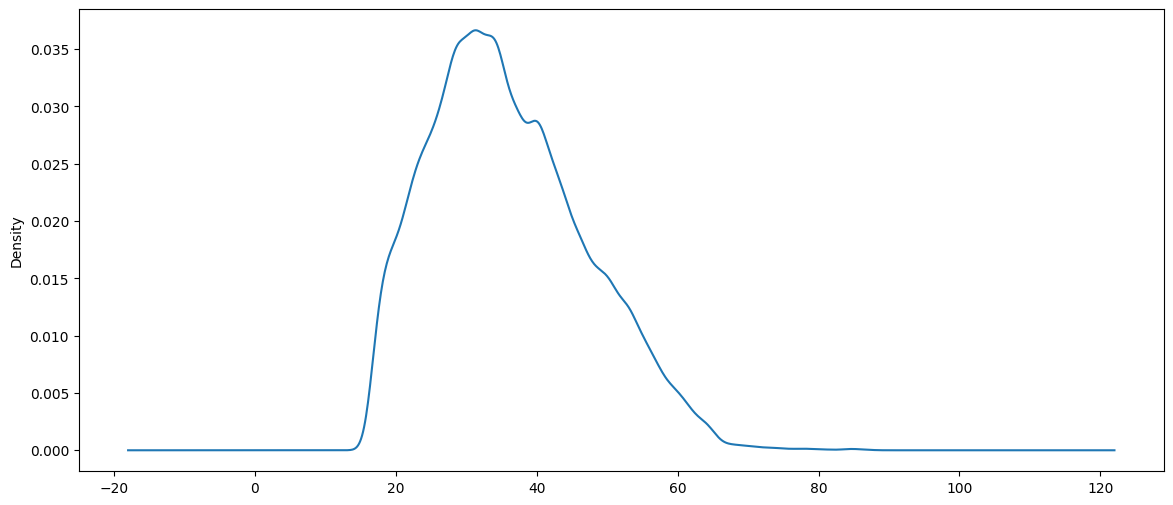

In [225]:
sales['Customer_Age'].plot(kind='kde', figsize=(14,6))

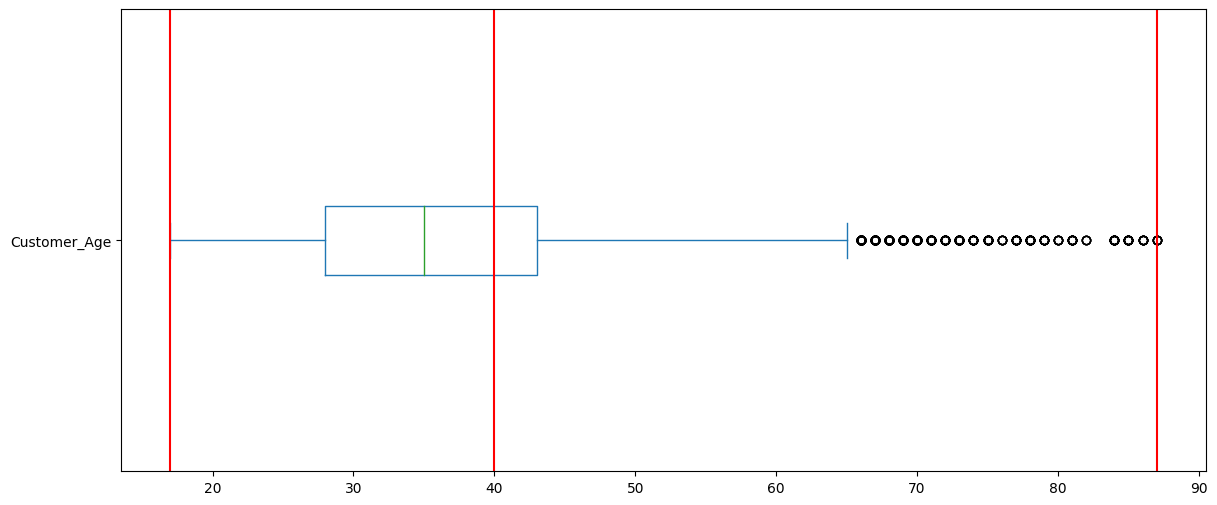

In [226]:
ax= sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))
ax.axvline(sales['Customer_Age'].max(), color='red')
ax.axvline(sales['Customer_Age'].min(), color='red')
ax.axvline(40, color='red')

In [227]:
sales['Customer_Age'].agg(Min='min', Median='median', Max='max')


Min       17.0
Median    35.0
Max       87.0
Name: Customer_Age, dtype: float64

In [228]:
Customer_Age_mean = round(sales['Customer_Age'].mean(), 1)

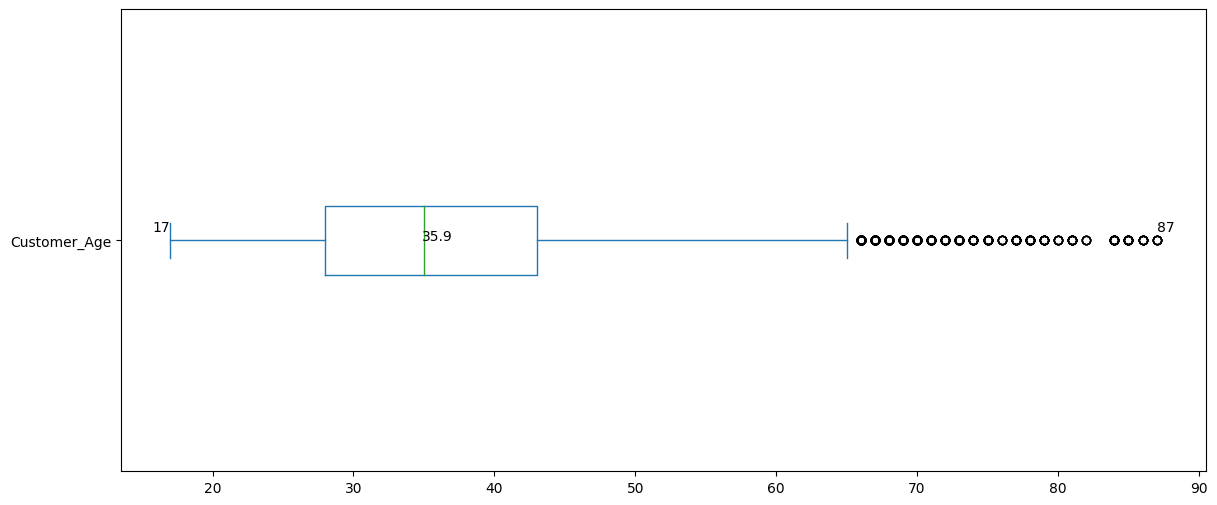

In [229]:
box =sales['Customer_Age'].plot(kind='box', vert=False, figsize=(14,6))
box.annotate(str(Customer_Age_mean), xy = (sales['Customer_Age'].mean(), 1), ha='center')

box.annotate(str(sales['Customer_Age'].min()), xy = (sales['Customer_Age'].min(), 1.02), ha='right')

box.annotate(str(sales['Customer_Age'].max()), xy = (sales['Customer_Age'].max(), 1.02), ha='left');

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What's the mean of `Order_Quantity`?

In [230]:
sales['Order_Quantity'].mean()

11.901659648253654

Go ahead and show a <b>histogram</b> and a <b>box plot</b> with the `Order_Quantity` data:

<Axes: ylabel='Frequency'>

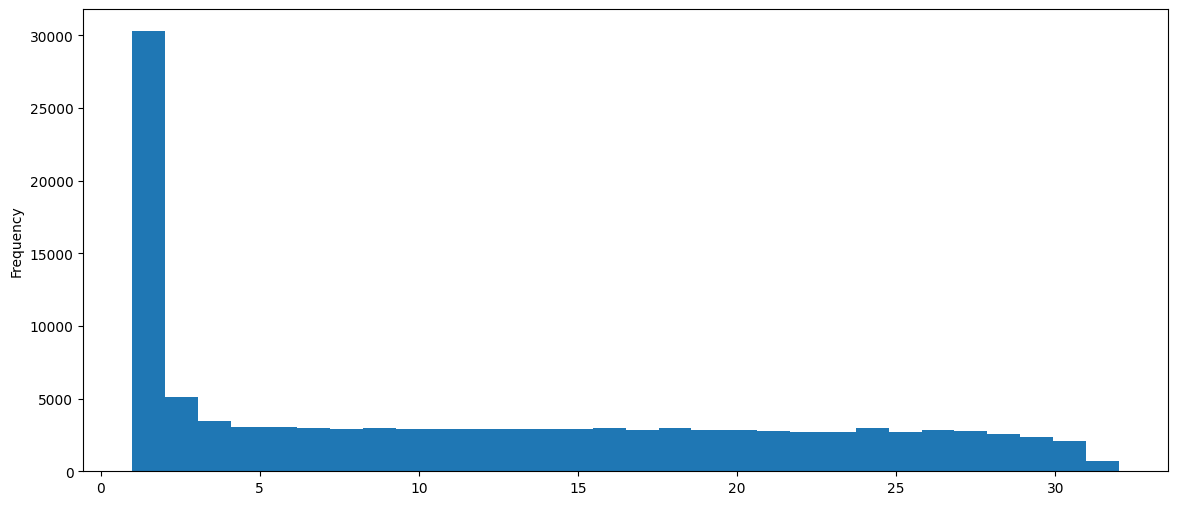

In [231]:
sales['Order_Quantity'].plot(kind='hist', bins=30, figsize=(14,6))

<Axes: >

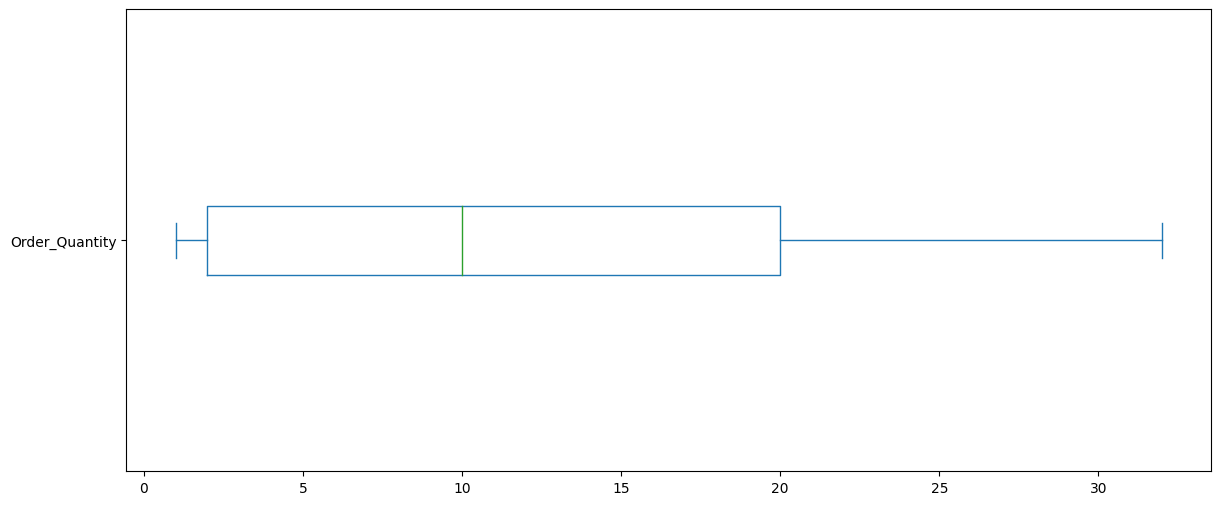

In [232]:
sales['Order_Quantity'].plot(kind='box', vert=False, figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per year do we have?

In [233]:
sales['Year'].value_counts()

Year
2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: count, dtype: int64

Go ahead and show a <b>pie plot</b> with the previous data:

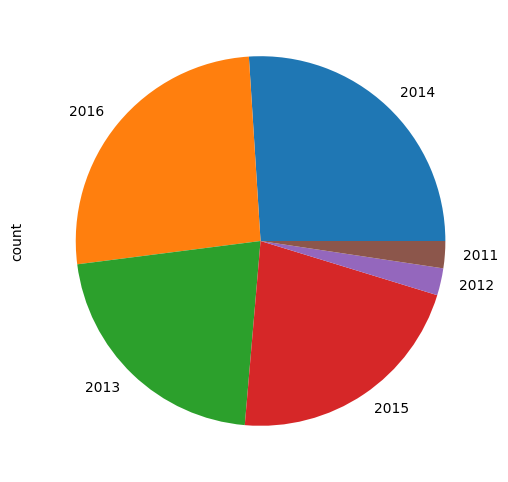

In [234]:
sales['Year'].value_counts().plot(kind='pie', figsize=(6,6));

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales per month do we have?

In [235]:
sales['Month'].value_counts()

Month
June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: count, dtype: int64

Go ahead and show a <b>bar plot</b> with the previous data:

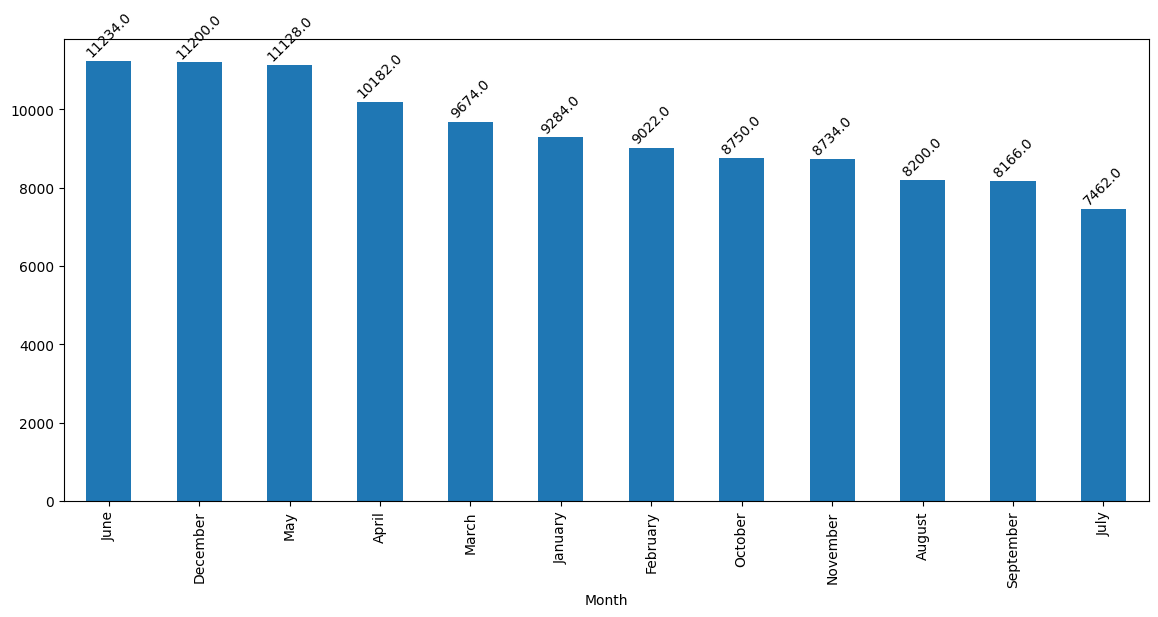

In [236]:
ax =sales['Month'].value_counts().plot(kind='bar', figsize=(14,6))

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f', padding=1, rotation=45);

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which country has the most sales `quantity of sales`?

In [237]:
sales['Country'].value_counts().head(1)

Country
United States    39206
Name: count, dtype: int64

In [238]:
sales['Country'].value_counts()

Country
United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: count, dtype: int64

Go ahead and show a <b>bar plot</b> of the sales per country:

<Axes: xlabel='Country'>

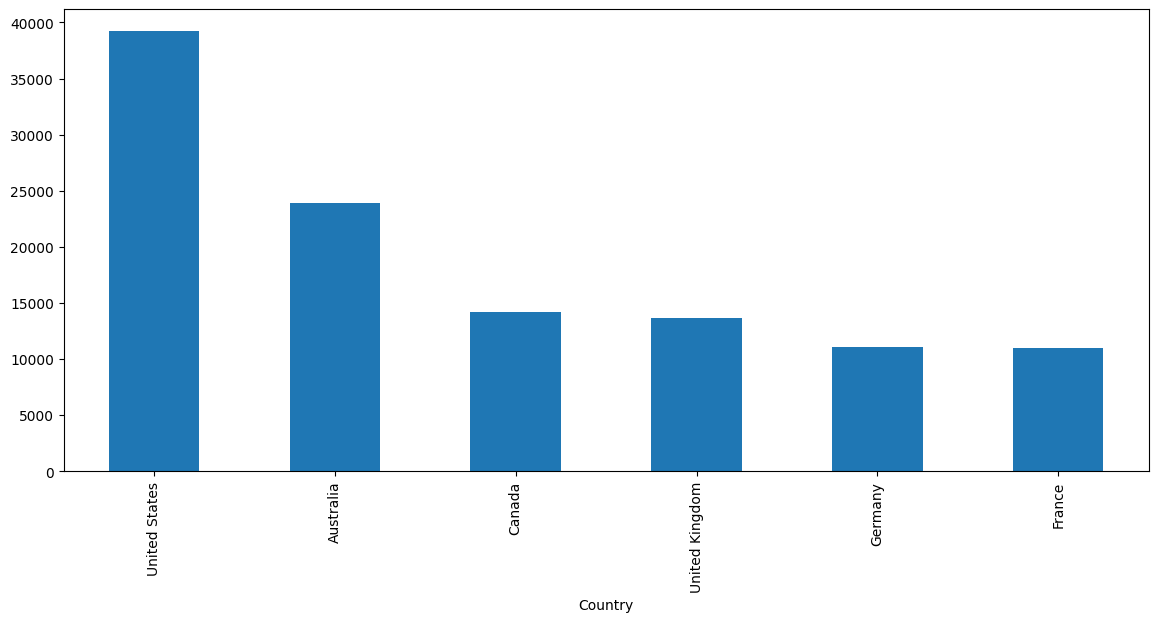

In [239]:
sales['Country'].value_counts().plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Create a list of every product sold

In [240]:
#sales.loc[:, 'Product'].unique()

sales['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

In [241]:
sales['Product'].nunique()

130

Create a **bar plot** showing the 10 most sold products (best sellers):

<Axes: xlabel='Product'>

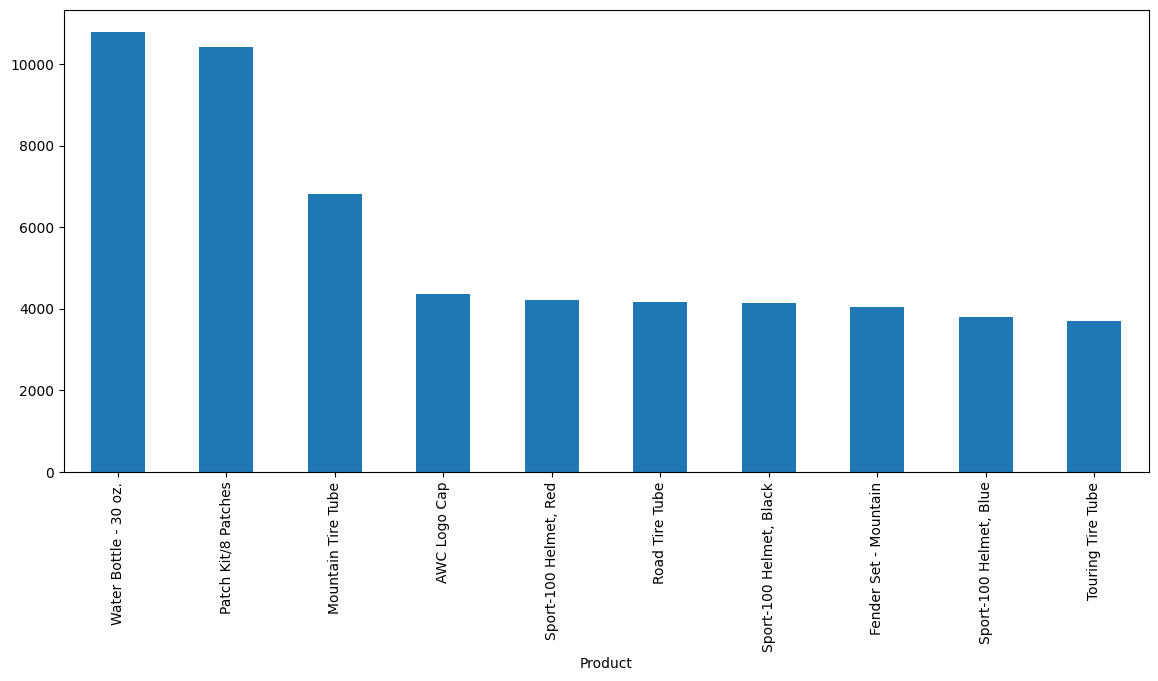

In [242]:
sales['Product'].value_counts().head(10).plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Unit_Cost` and `Unit_Price`?

Show a <b>scatter plot</b> between both columns.

<Axes: xlabel='Unit_Cost', ylabel='Unit_Price'>

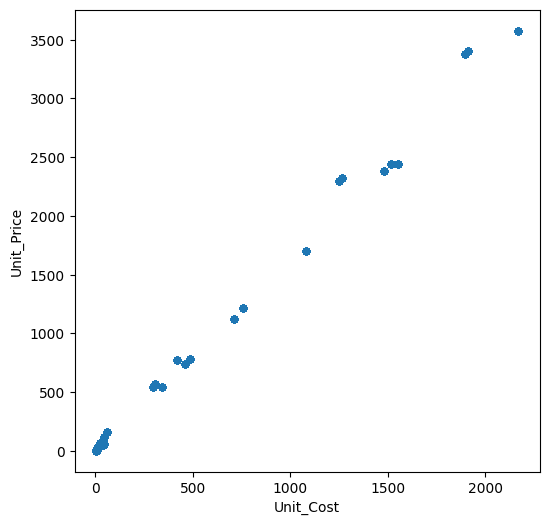

In [243]:
sales.plot(kind='scatter', x='Unit_Cost', y='Unit_Price', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Order_Quantity` and `Profit`?

Show a <b>scatter plot</b> between both columns.

<Axes: xlabel='Order_Quantity', ylabel='Profit'>

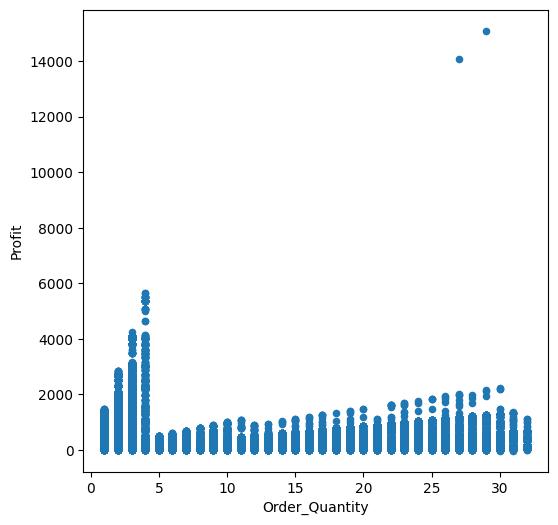

In [244]:
sales.plot(kind='scatter', x='Order_Quantity', y='Profit', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between `Profit` per `Country`?

Show a grouped <b>box plot</b> per country with the profit values.

<Axes: title={'center': 'Profit'}, xlabel='[Country]'>

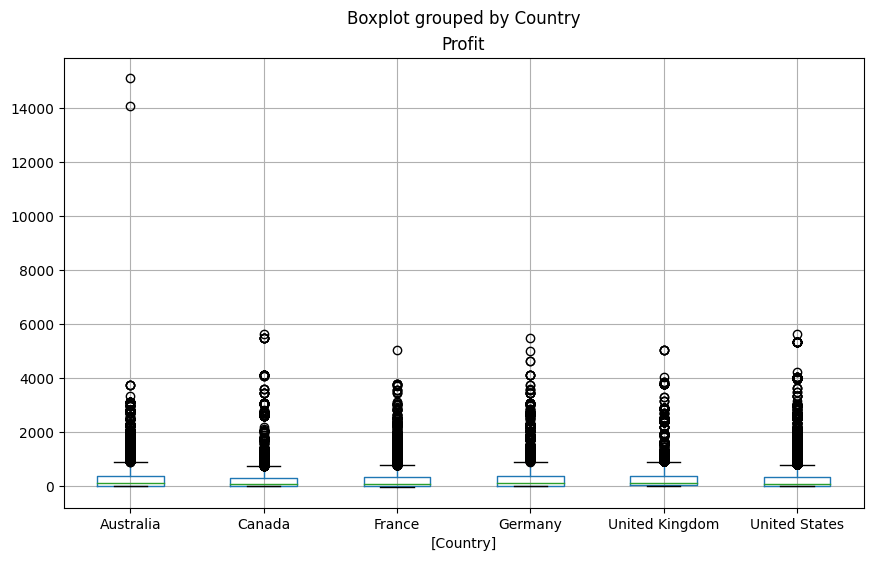

In [245]:
sales[['Profit', 'Country']].boxplot(by='Country', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Can you see any relationship between the `Customer_Age` per `Country`?

Show a grouped <b>box plot</b> per country with the customer age values.

<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

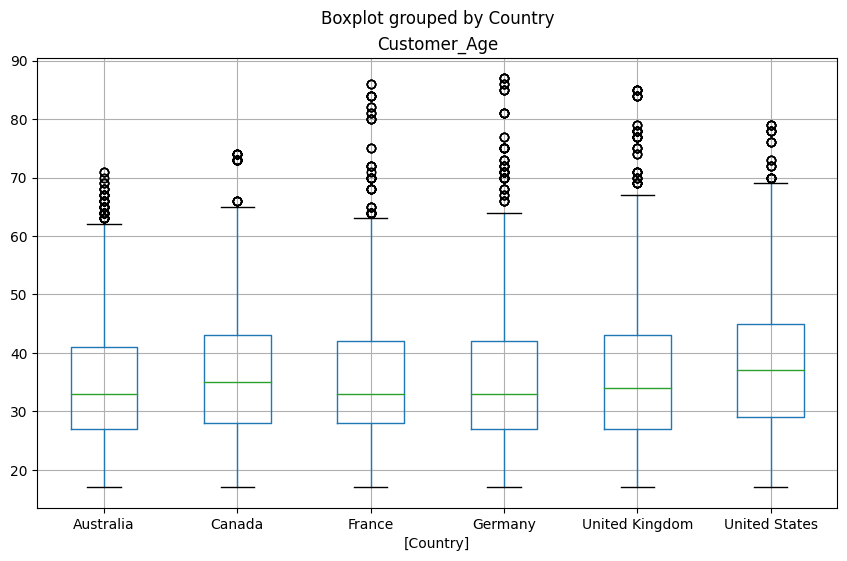

In [246]:
sales[['Customer_Age', 'Country']].boxplot(by='Country', figsize=(10,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add and calculate a new `Calculated_Date` column

Use `Day`, `Month`, `Year` to create a `Date` column (`YYYY-MM-DD`).

In [247]:
sales[['Year', 'Month', 'Day']]

,Year,Month,Day
0,2013,November,26
1,2015,November,26
2,2014,March,23
3,2016,March,23
4,2014,May,15
...,...,...,...
113031,2016,April,12
113032,2014,April,2
113033,2016,April,2
113034,2014,March,4


In [248]:
sales[['Year', 'Month', 'Day']]

,Year,Month,Day
0,2013,November,26
1,2015,November,26
2,2014,March,23
3,2016,March,23
4,2014,May,15
...,...,...,...
113031,2016,April,12
113032,2014,April,2
113033,2016,April,2
113034,2014,March,4


In [249]:
#sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[2], x[1], x[0]), axis=1)
sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x.iloc[2], x.iloc[1], x.iloc[0]), axis=1)

0         26-November-2013
1         26-November-2015
2            23-March-2014
3            23-March-2016
4              15-May-2014
                ...       
113031       12-April-2016
113032        2-April-2014
113033        2-April-2016
113034        4-March-2014
113035        4-March-2016
Length: 113036, dtype: object

In [250]:
date_= sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x.iloc[2], x.iloc[1], x.iloc[0]), axis=1)
date_

0         26-November-2013
1         26-November-2015
2            23-March-2014
3            23-March-2016
4              15-May-2014
                ...       
113031       12-April-2016
113032        2-April-2014
113033        2-April-2016
113034        4-March-2014
113035        4-March-2016
Length: 113036, dtype: object

In [251]:
sales['Calculated_Date'] = sales[['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x.iloc[0], x.iloc[1], x.iloc[2]), axis=1)

sales['Calculated_Date'].head()

0    2013-November-26
1    2015-November-26
2       2014-March-23
3       2016-March-23
4         2014-May-15
Name: Calculated_Date, dtype: object

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Parse your `Calculated_Date` column into a datetime object

In [252]:
sales['Calculated_Date'] = pd.to_datetime(sales['Calculated_Date'])

sales['Calculated_Date'].head()

0   2013-11-26
1   2015-11-26
2   2014-03-23
3   2016-03-23
4   2014-05-15
Name: Calculated_Date, dtype: datetime64[ns]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How did sales evolve through the years?

Show a <b>line plot</b> using `Calculated_Date` column as the x-axis and the count of sales as the y-axis.

In [253]:
sales['Calculated_Date'].value_counts()

Calculated_Date
2016-03-01    288
2014-03-01    288
2013-12-07    241
2015-12-07    241
2016-06-14    236
             ... 
2011-02-21      1
2012-02-21      1
2012-05-29      1
2011-05-29      1
2012-11-04      1
Name: count, Length: 1884, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Calculated_Date', ylabel='count'>

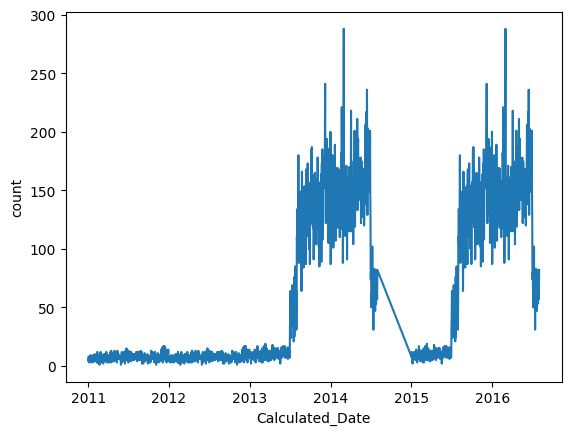

In [254]:
import seaborn as sns
sns.lineplot(sales['Calculated_Date'].value_counts())

<Axes: xlabel='Calculated_Date', ylabel='count'>

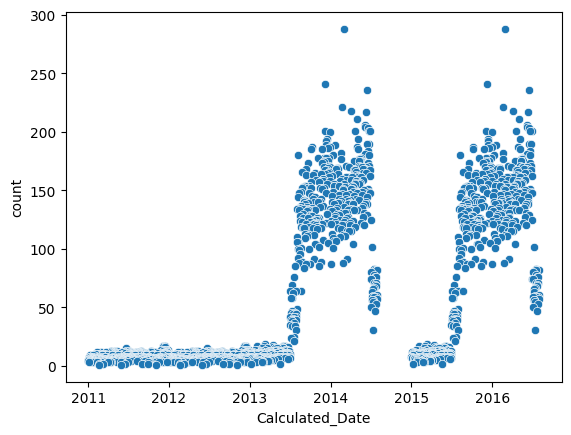

In [255]:
sns.scatterplot(sales['Calculated_Date'].value_counts())

array([<Axes: title={'center': 'count'}, xlabel='Month'>], dtype=object)

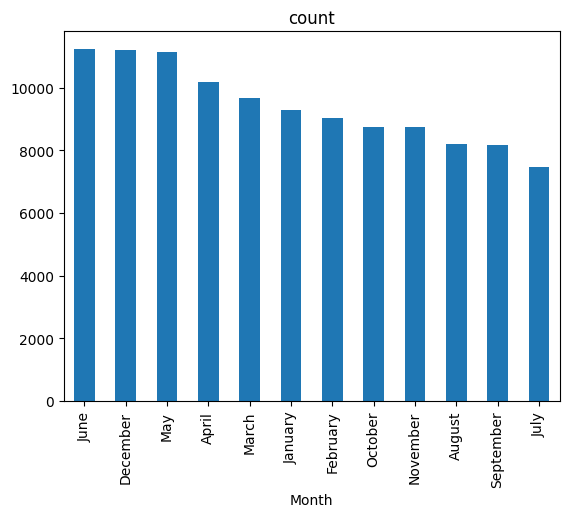

In [256]:
sales['Month'].value_counts().plot(kind='bar',subplots=True)

array([<Axes: title={'center': 'count'}, xlabel='Year'>], dtype=object)

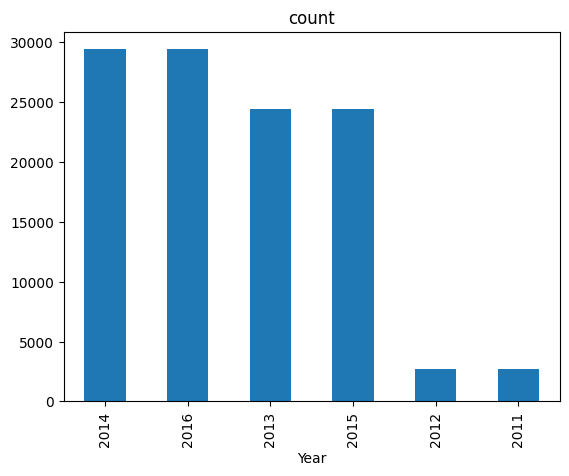

In [257]:
sales['Year'].value_counts().plot(kind='bar',subplots=True)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Increase 50 U$S revenue to every sale

In [258]:
#sales['Revenue'] = sales['Revenue'] + 50

sales['Revenue'] += 50

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in `Canada` or `France`?

In [259]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2013-11-26
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2015-11-26
14,2013-08-02,2,August,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,5,45,120,369,225,644,2013-08-02
15,2015-08-02,2,August,2015,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,517,315,882,2015-08-02
16,2013-09-02,2,September,2013,29,Young Adults (25-34),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,148,90,288,2013-09-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112979,2015-09-08,8,September,2015,31,Young Adults (25-34),M,France,Essonne,Clothing,Vests,"Classic Vest, M",28,24,64,1048,672,1770,2015-09-08
113000,2014-07-27,27,July,2014,34,Young Adults (25-34),M,France,Essonne,Clothing,Vests,"Classic Vest, M",6,24,64,225,144,419,2014-07-27
113001,2016-07-27,27,July,2016,34,Young Adults (25-34),M,France,Essonne,Clothing,Vests,"Classic Vest, M",7,24,64,262,168,480,2016-07-27
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1310,2014-03-04


In [260]:
sales.loc[(sales['Country'] == 'Canada') | (sales['Country'] == 'France')].shape[0]

25176

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many `Bike Racks` orders were made from Canada?

In [261]:
sales.loc[(sales['Country'] == 'Canada') & (sales['Sub_Category'] == 'Bike Racks')].shape[0]

104

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in each region (state) of France?

In [262]:
sales.loc[sales['Country'] == 'France']['State']


50        Seine Saint Denis
51        Seine Saint Denis
52                  Moselle
53                  Moselle
60                     Nord
                ...        
112979              Essonne
113000              Essonne
113001              Essonne
113034        Seine (Paris)
113035        Seine (Paris)
Name: State, Length: 10998, dtype: object

In [263]:
sales.loc[sales['Country'] == 'France']['State'].value_counts()

State
Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: count, dtype: int64

In [264]:
france_states = sales.loc[sales['Country'] == 'France', 'State'].value_counts()

france_states

State
Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: count, dtype: int64

Go ahead and show a <b>bar plot</b> with the results:

<Axes: xlabel='State'>

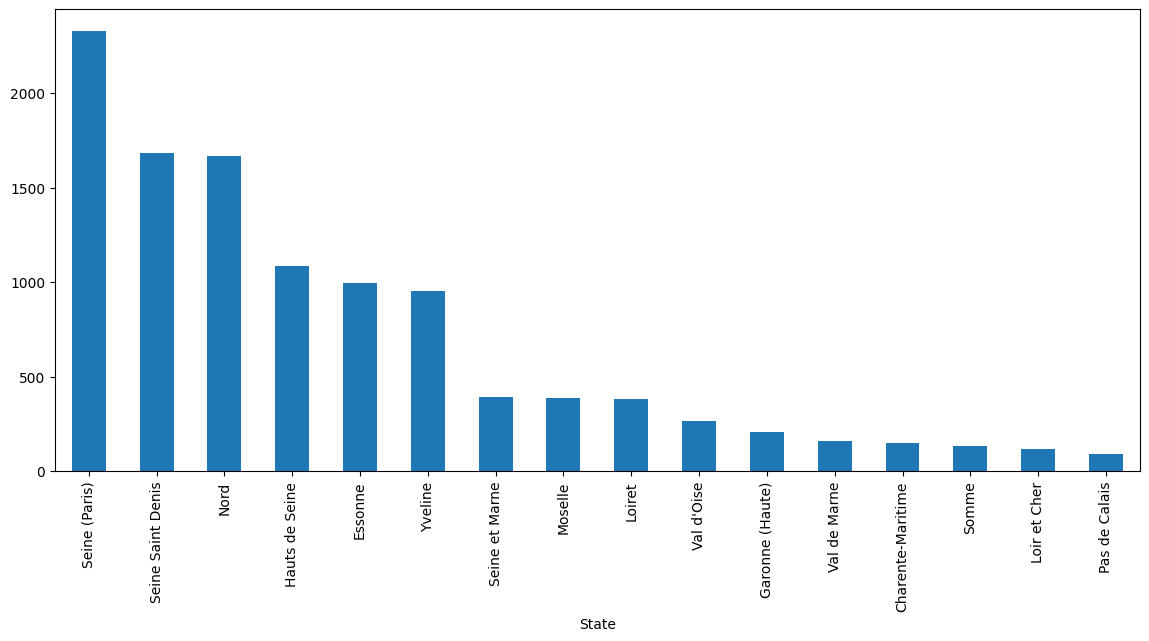

In [265]:
france_states.plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales were made per category?

In [266]:
sales['Product_Category'].value_counts()

Product_Category
Accessories    70120
Bikes          25982
Clothing       16934
Name: count, dtype: int64

Go ahead and show a <b>pie plot</b> with the results:

<Axes: ylabel='count'>

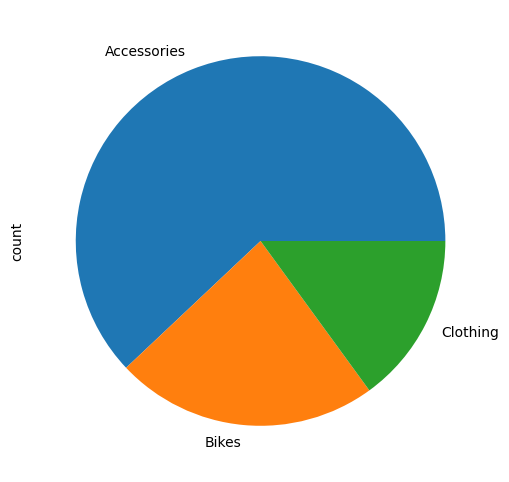

In [267]:
sales['Product_Category'].value_counts().plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per accessory sub-categories?

In [268]:
sales.loc[sales['Product_Category'] == 'Accessories']

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2013-11-26
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,1000,2015-11-26
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2451,2014-03-23
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2138,2016-03-23
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,468,2014-05-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108369,2016-03-04,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Accessories,Tires and Tubes,Patch Kit/8 Patches,15,1,2,10,15,75,2016-03-04
108370,2014-04-27,27,April,2014,37,Adults (35-64),F,France,Seine (Paris),Accessories,Tires and Tubes,Patch Kit/8 Patches,13,1,2,8,13,71,2014-04-27
108371,2014-04-27,27,April,2014,37,Adults (35-64),F,France,Seine (Paris),Accessories,Tires and Tubes,Patch Kit/8 Patches,5,1,2,3,5,58,2014-04-27
108372,2016-04-27,27,April,2016,37,Adults (35-64),F,France,Seine (Paris),Accessories,Tires and Tubes,Patch Kit/8 Patches,15,1,2,10,15,75,2016-04-27


In [269]:
accessories = sales.loc[sales['Product_Category'] == 'Accessories', 'Sub_Category'].value_counts()

accessories

Sub_Category
Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: count, dtype: int64

Go ahead and show a <b>bar plot</b> with the results:

<Axes: xlabel='Sub_Category'>

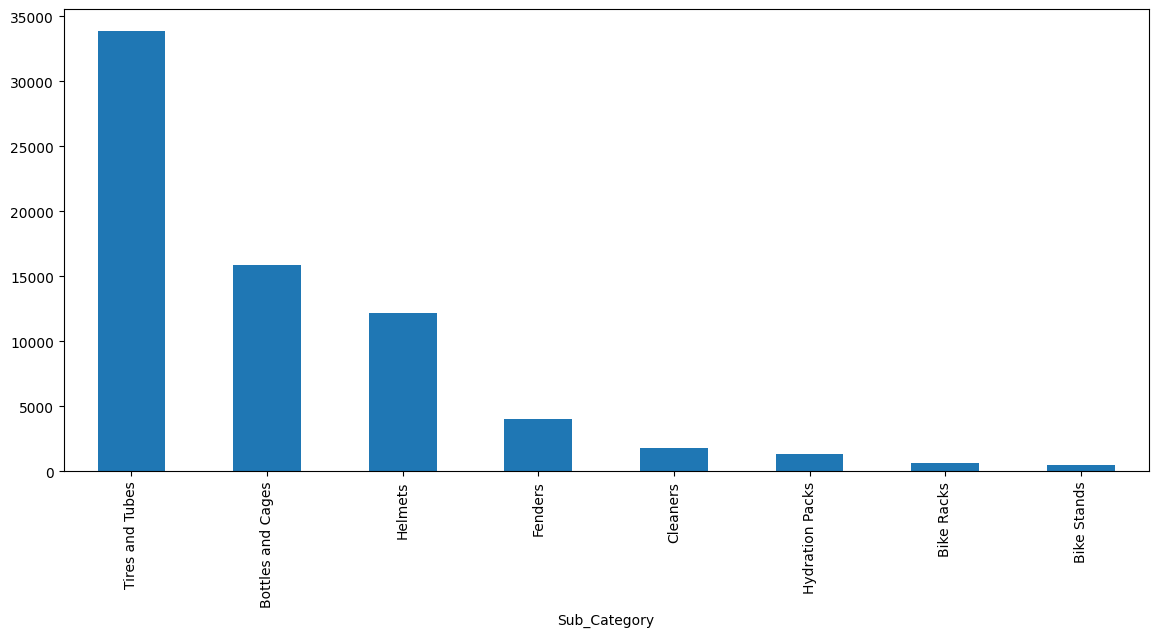

In [270]:
accessories.plot(kind='bar', figsize=(14,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made per bike sub-categories?

In [271]:
bikes = sales.loc[sales['Product_Category'] == 'Bikes', 'Sub_Category'].value_counts()

bikes

Sub_Category
Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: count, dtype: int64

Go ahead and show a <b>pie plot</b> with the results:

<Axes: ylabel='count'>

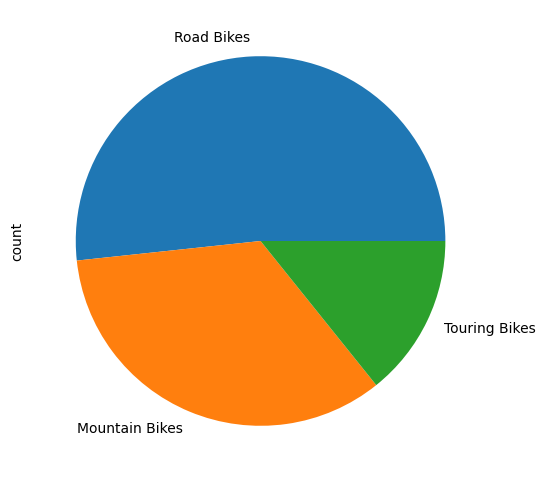

In [272]:
bikes.plot(kind='pie', figsize=(6,6))

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which gender has the most amount of sales?

In [273]:
sales['Customer_Gender'].value_counts()

Customer_Gender
M    58312
F    54724
Name: count, dtype: int64

<Axes: xlabel='Customer_Gender'>

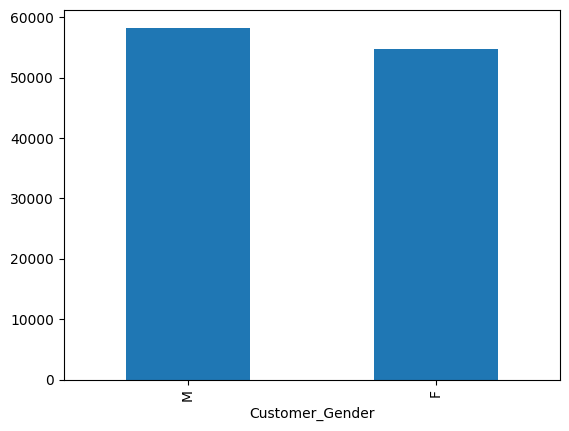

In [274]:
sales['Customer_Gender'].value_counts().plot(kind='bar')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many sales with more than 500 in `Revenue` were made by men?

In [275]:
sales.loc[(sales['Customer_Gender'] == 'M') & (sales['Revenue'] >= 500)].shape[0]

23392

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the top-5 sales with the highest revenue

In [276]:
sales.sort_values(['Revenue'], ascending=False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54119,2013-07-24
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14362,2011-07-08
70307,2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-04-30
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14219,2011-09-30


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Get the sale with the highest revenue

In [277]:
#sales.sort_values(['Revenue'], ascending=False).head(1)

cond = sales['Revenue'] == sales['Revenue'].max()

sales.loc[cond]

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58124,2015-07-24


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with more than 10K in revenue?

In [278]:
cond = sales['Revenue'] > 10_000

sales.loc[cond, 'Order_Quantity'].mean()

3.689265536723164

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### What is the mean `Order_Quantity` of orders with less than 10K in revenue?

In [279]:
cond = sales['Revenue'] < 10_000

sales.loc[cond, 'Order_Quantity'].mean()

11.914539380997528

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made in May of 2016?

In [280]:
cond = (sales['Year'] == 2016) & (sales['Month'] == 'May')

sales.loc[cond].shape[0]

5015

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### How many orders were made between May and July of 2016?

In [281]:
cond = (sales['Year'] == 2016) & (sales['Month'].isin(['May', 'June', 'July']))

sales.loc[cond].shape[0]

12164

Show a grouped <b>box plot</b> per month with the profit values.

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Add 7.2% TAX on every sale `Unit_Price` within United States

In [282]:
#sales.loc[sales['Country'] == 'United States', 'Unit_Price'] = sales.loc[sales['Country'] == 'United States', 'Unit_Price'] * 1.072

sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072

/tmp/ipykernel_33/88156556.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[128.64  128.64  128.64  ...  68.608  68.608  68.608]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sales.loc[sales['Country'] == 'United States', 'Unit_Price'] *= 1.072


In [283]:
sales.loc[sales['Country'] == 'United States', 'Unit_Price']

22        128.640
23        128.640
34        128.640
35        128.640
38        128.640
           ...   
113021     68.608
113022     68.608
113023     68.608
113024     68.608
113025     68.608
Name: Unit_Price, Length: 39206, dtype: float64

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)